In [3]:
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import scipy.fftpack

## Understanding the data

### Class1

Let's open the files from Class1 in order to understand what is it.

In [4]:
df_class1 = []

df_class1.append(np.load('./Class1/N1-PASSTHROUGH-15-07-29.npy'))

print("Class1 first file is of type: ", type(df_class1))

Class1 first file is of type:  <class 'list'>


In [3]:
print("Class1 first file is a list of length: ", len(df_class1))

Class1 first file is a list of length:  1


In [4]:
display(df_class1[0])

array([-4.55315829e-07,  1.38722018e-06,  1.26157188e-06, ...,
       -5.05451959e-06, -4.28239176e-06, -2.77187002e-06])

In [5]:
print("Class1 first file is a list of one single array of shape: ", df_class1[0].shape)

Class1 first file is a list of one single array of shape:  (2400,)


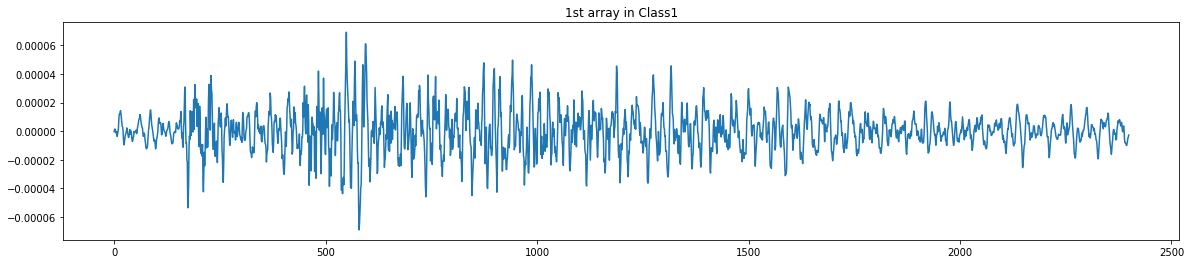

In [6]:
plt.figure(num=None, figsize=(20, 4))
plt.plot(df_class1[0])
plt.title('1st array in Class1')
plt.show()

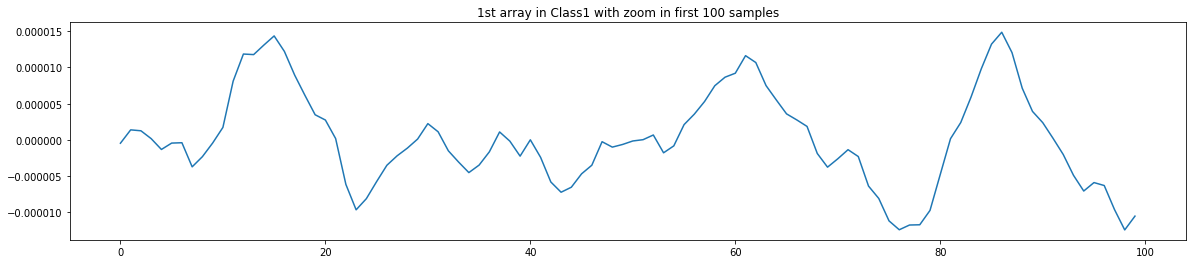

In [6]:
plt.figure(num=None, figsize=(20, 4))
plt.plot(df_class1[0][:100])
plt.title('1st array in Class1 with zoom in first 100 samples')
plt.show()

In [17]:
path = './Class1/'

df_class1 = []

for filename in glob.glob(os.path.join(path, '*.npy')):
    df_class1.append(np.load(filename))

print("Class1 first file is of type: ", type(df_class1))

Class1 first file is of type:  <class 'list'>


In [8]:
print("Class1 files are a list of length: ", len(df_class1))

Class1 files are a list of length:  24


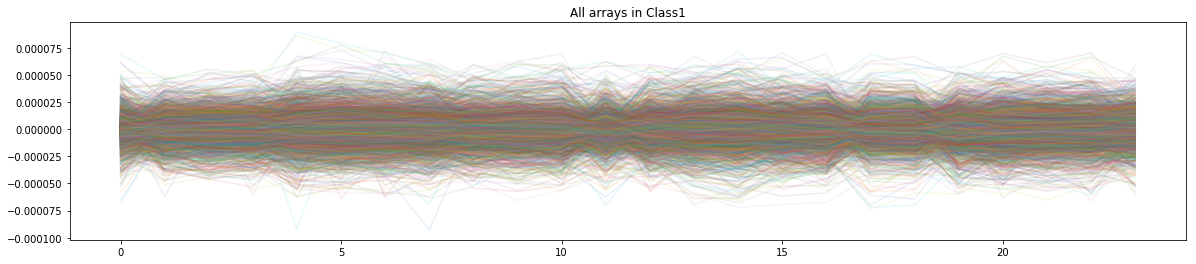

In [9]:
plt.figure(num=None, figsize=(20, 4))
plt.plot(df_class1, alpha=0.1)
plt.title('All arrays in Class1')
plt.show()

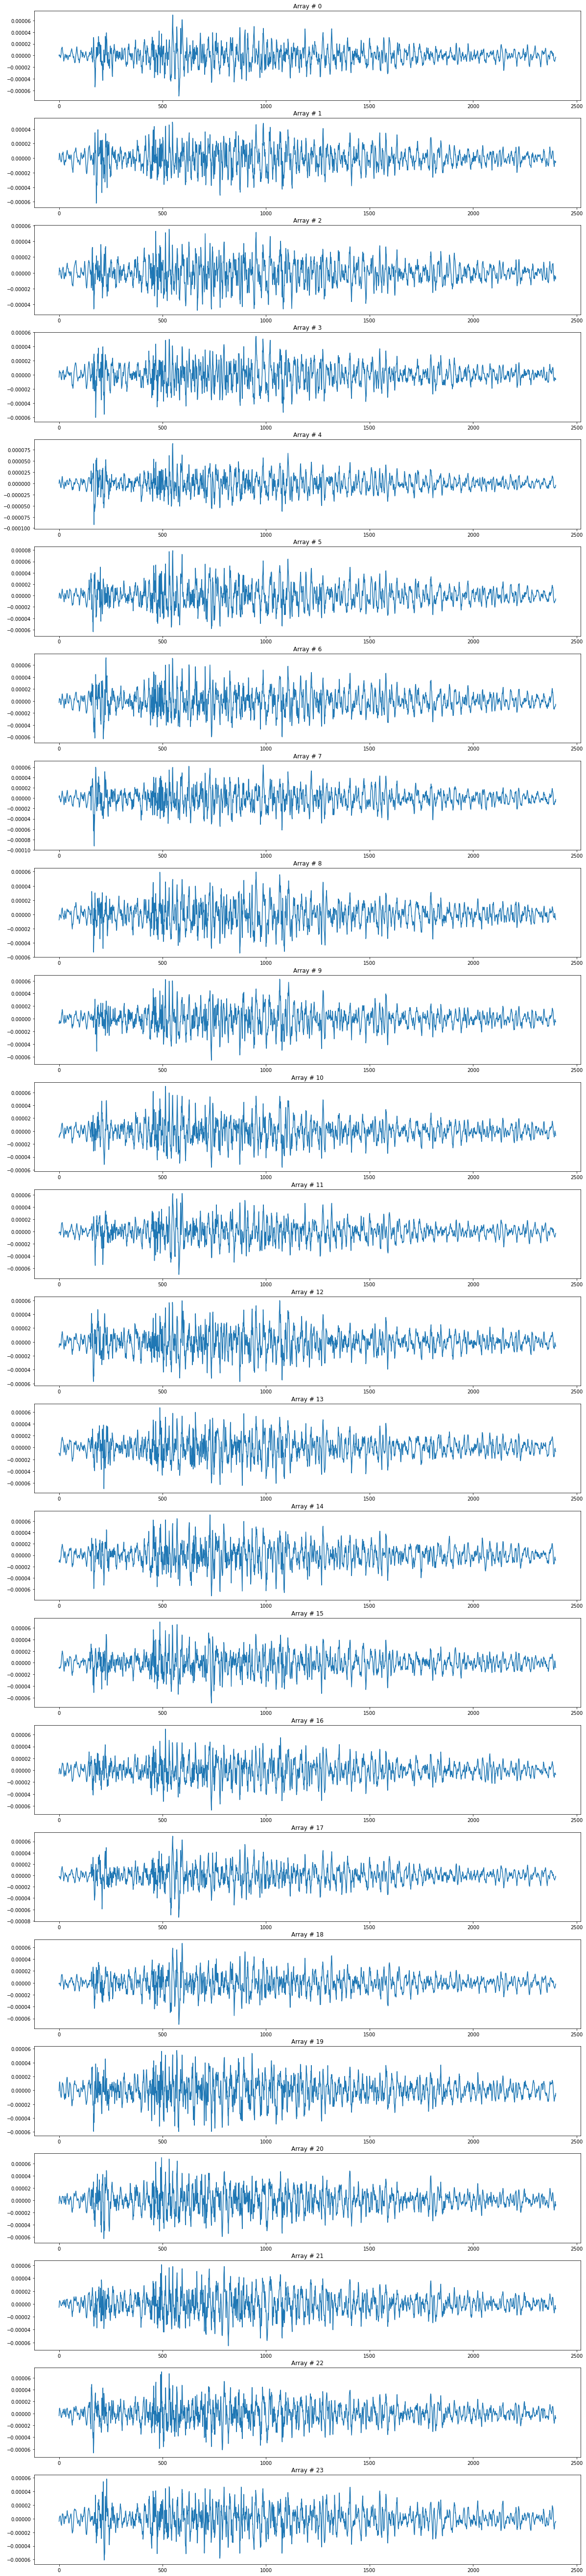

In [10]:
plt.figure(num=None, figsize=(20, 4*len(df_class1)))

for i, arr in enumerate(df_class1):
    plt.subplot(len(df_class1),1,i+1)
    plt.plot(arr)
    plt.title('Array # ' + str(i))
    
plt.show()

The plots look like sounds. Let's try to hear one in order to explore this possibility.

In [85]:
import sounddevice as sd

fs = 44100
data = df_class1[20]
scaled = np.int16(data/np.max(np.abs(data)) * 32767)
sd.play(scaled, fs)

Hearing the signals lead to no conclusion. It might be impact noises such as gun fire or gas escaping rapidly from a pressurized chamber but not sure. But maybe it is just my hear that is not trained enough to notice the difference between them...

### Class2

Let's open the files from Class2 in order to understand what is it.

In [11]:
df_class2 = []

df_class2.append(np.load('./Class2/T1-PASSTHROUGH-15-10-17.npy'))

print("Class2 first file is of type: ", type(df_class1))

Class2 first file is of type:  <class 'list'>


In [13]:
print("Class2 first file is a list of length: ", len(df_class2))

Class2 first file is a list of length:  1


In [14]:
display(df_class2[0])

array([-1.49929900e-06, -1.49206704e-06, -4.14866562e-06, ...,
       -1.70953830e-06, -2.45142268e-06, -2.13556707e-06])

In [15]:
print("Class2 first file is a list of one single array of shape: ", df_class2[0].shape)

Class2 first file is a list of one single array of shape:  (2400,)


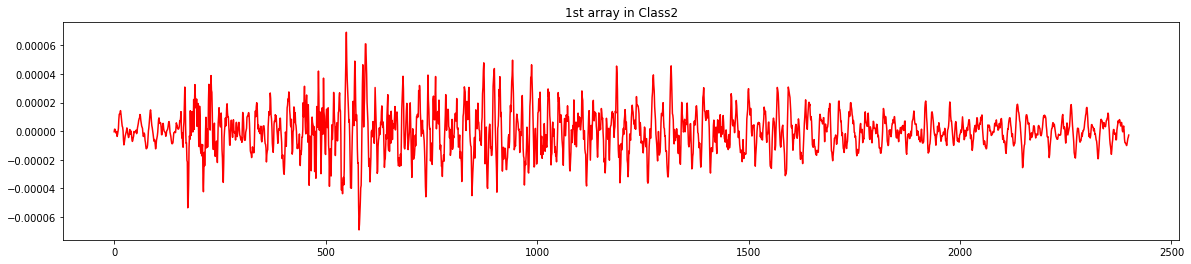

In [16]:
plt.figure(num=None, figsize=(20, 4))
plt.plot(df_class1[0], color='r')
plt.title('1st array in Class2')
plt.show()

In [18]:
path = './Class2/'

df_class2 = []

for filename in glob.glob(os.path.join(path, '*.npy')):
    df_class2.append(np.load(filename))

print("Class2 first file is of type: ", type(df_class2))

Class2 first file is of type:  <class 'list'>


In [18]:
print("Class2 files are a list of length: ", len(df_class2))

Class2 files are a list of length:  24


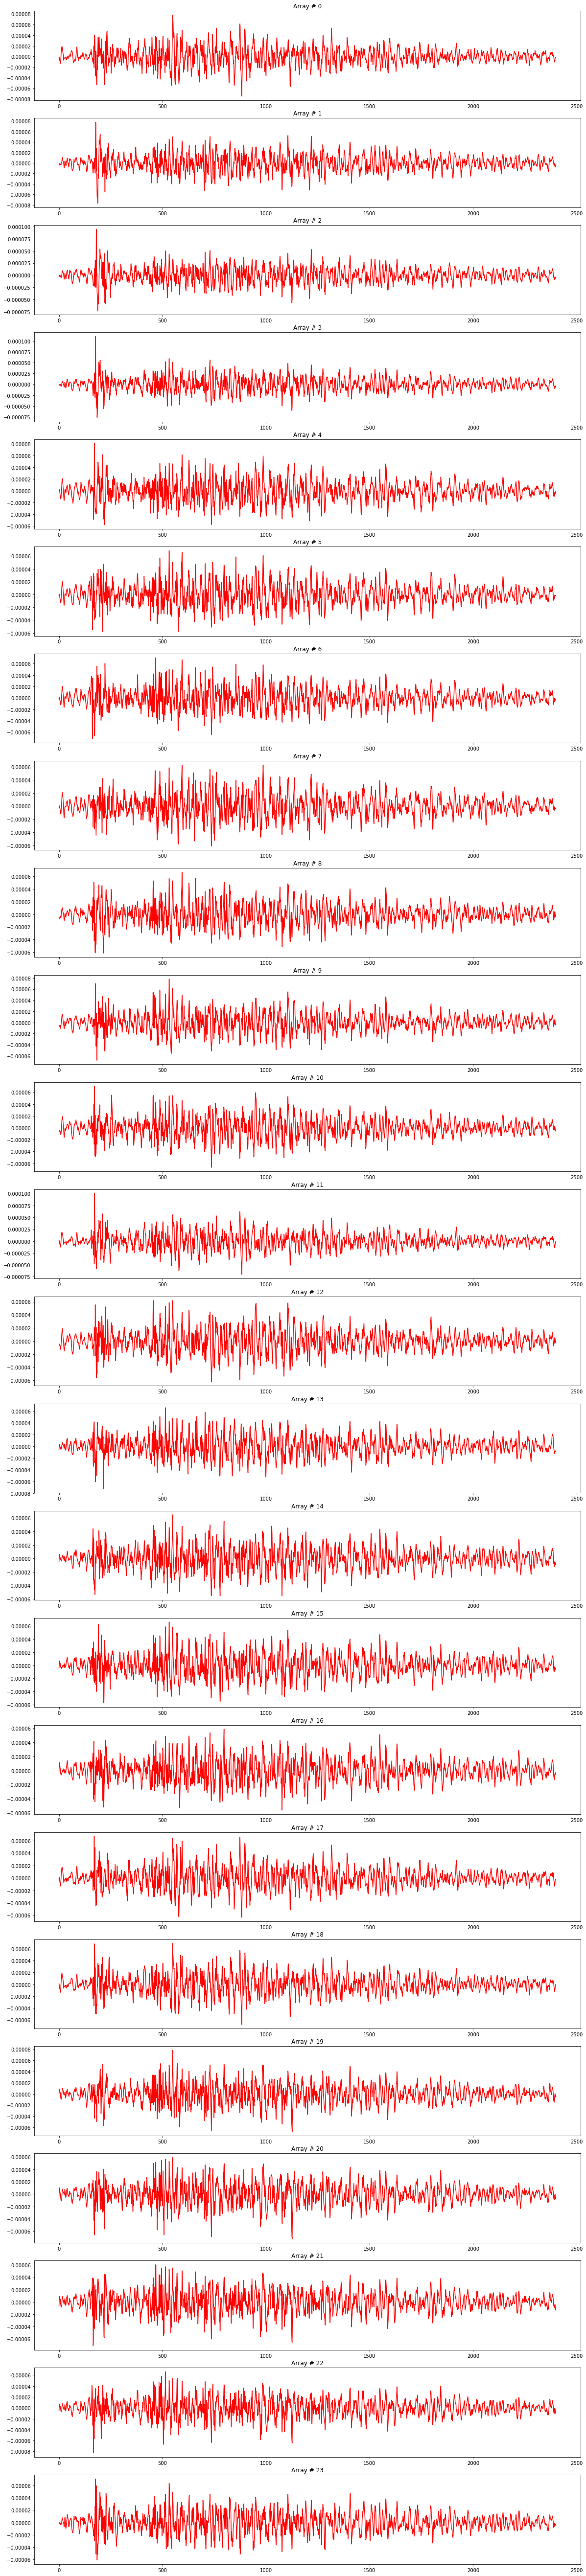

In [33]:
plt.figure(num=None, figsize=(20, 4*len(df_class1)))

for i, arr in enumerate(df_class2):
    plt.subplot(len(df_class2),1,i+1)
    plt.plot(arr, c='r')
    plt.title('Array # ' + str(i))
    
plt.show()

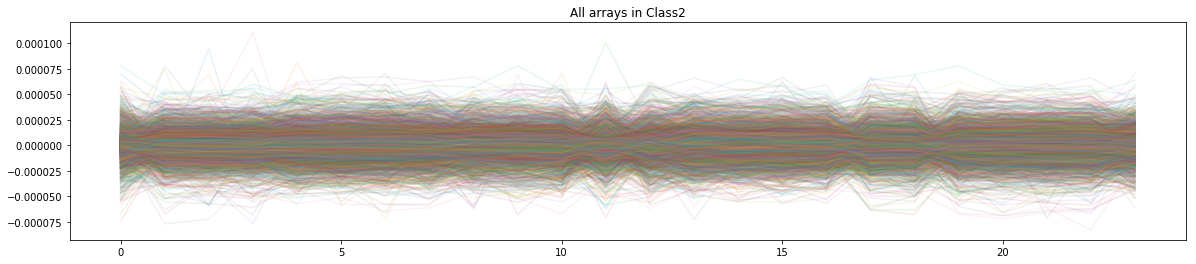

In [19]:
plt.figure(num=None, figsize=(20, 4))
plt.plot(df_class2, alpha=0.1)
plt.title('All arrays in Class2')
plt.show()

In [97]:
fs = 44100
data = df_class2[20]
scaled = np.int16(data/np.max(np.abs(data)) * 32767)
sd.play(scaled, fs)

### Class1 and Class2

So all files from both classes do look like the data from the same kind of phenomenon.

Let's compare them.

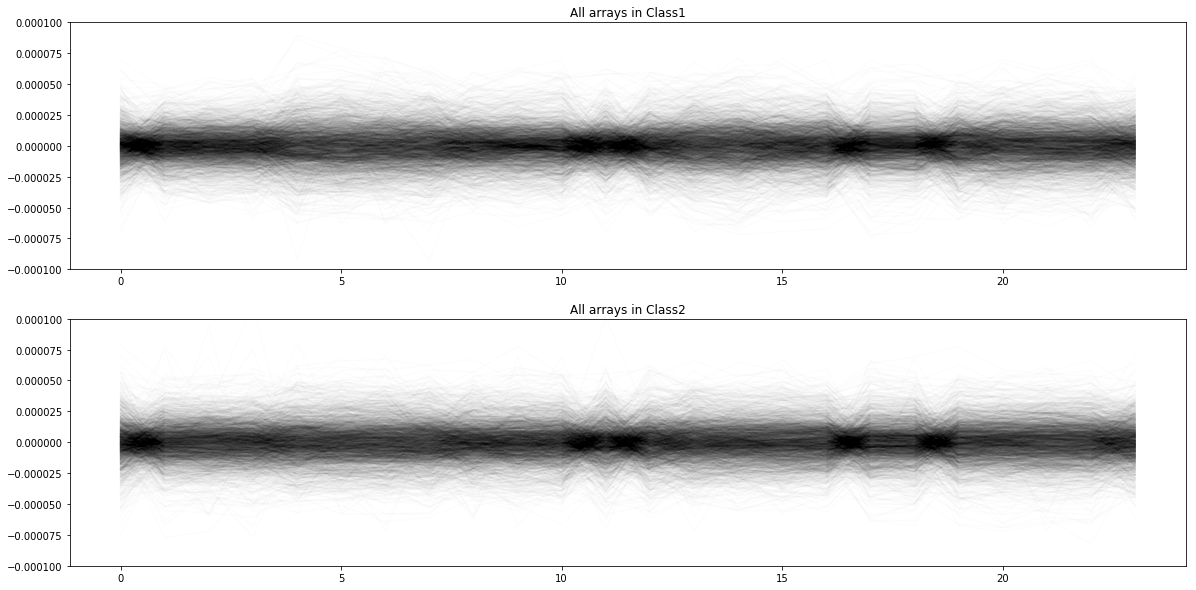

In [21]:
plt.figure(num=None, figsize=(20, 10))

y_lims = .0001
alpha = 0.01

plt.subplot(2,1,1)
plt.plot(df_class1, alpha=alpha, c='k')
plt.title('All arrays in Class1')
plt.ylim((-y_lims, y_lims))

plt.subplot(2,1,2)
plt.plot(df_class2, alpha=alpha, c='k')
plt.title('All arrays in Class2')
plt.ylim((-y_lims, y_lims))
    
plt.show()

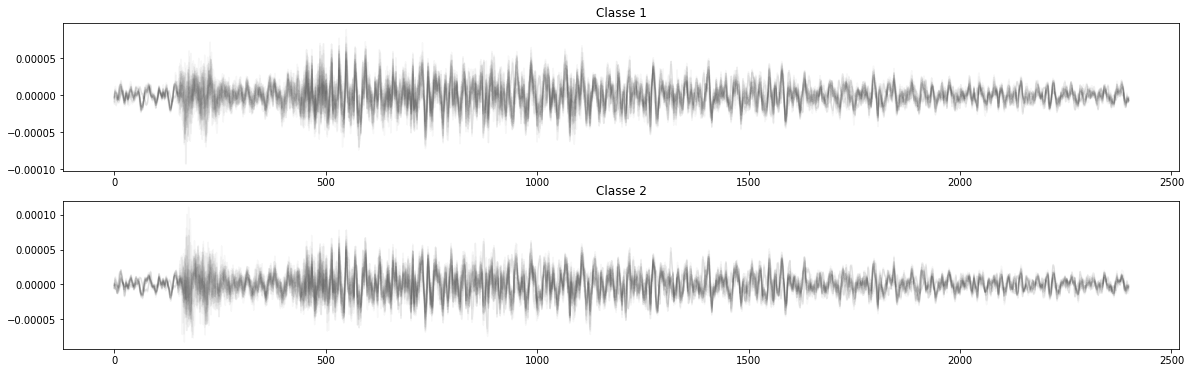

In [79]:
plt.figure(num=None, figsize=(20, 6))

alpha=0.03
index = range(0, 2400)
           
plt.subplot(2,1,1)
for i, arr in enumerate(df_class1):
    plt.plot(arr[index], alpha=alpha, c='k')
    plt.title('Classe 1')
           
plt.subplot(2,1,2)
for i, arr in enumerate(df_class2):
    plt.plot(arr[index], alpha=alpha, c='k')
    plt.title('Classe 2')
    
plt.show()

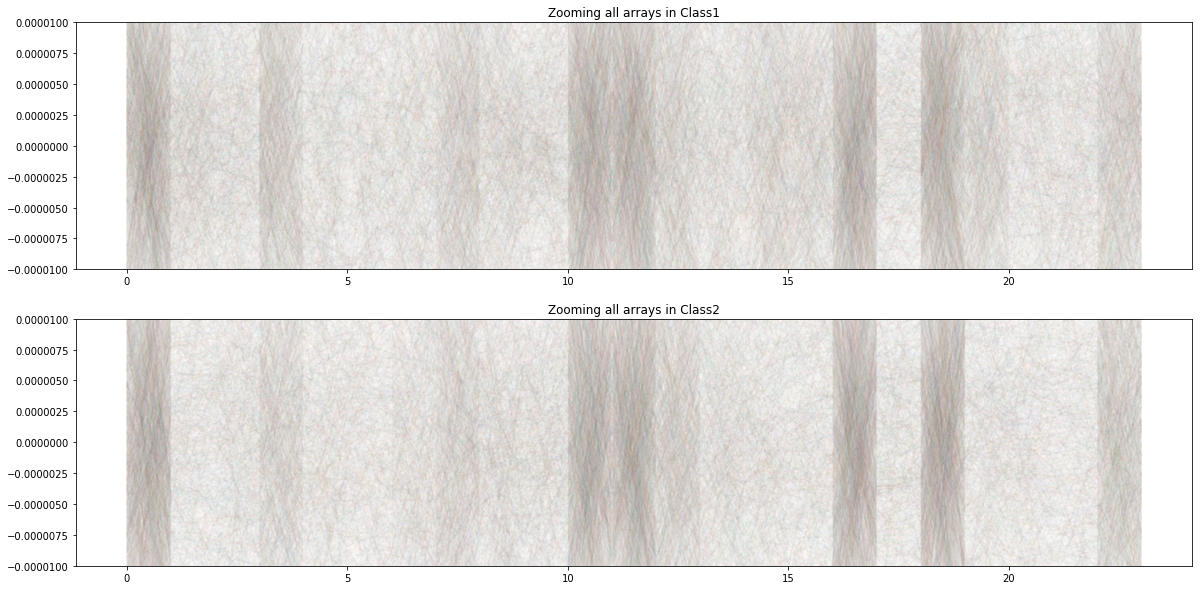

In [22]:
plt.figure(num=None, figsize=(20, 10))

y_lims = .00001
alpha = 0.01

plt.subplot(2,1,1)
plt.plot(df_class1, alpha=alpha)
plt.title('Zooming all arrays in Class1')
plt.ylim((-y_lims, y_lims))

plt.subplot(2,1,2)
plt.plot(df_class2, alpha=alpha)
plt.title('Zooming all arrays in Class2')
plt.ylim((-y_lims, y_lims))
    
plt.show()

The difference between the Class1 and Class2 might be the darkness of some stripes:

| Tables   |    3 to 4   |  7 to 8   |  16 to 17 |  18 to 19 |  19 to 20 |  23 to 24 |
|----------|:-----------:|----------:|----------:|----------:|----------:|----------:|
|  Class1  |   darker    |   darker  |   lighter |   lighter |   darker  |   lighter |
|  Class2  |    lighter  |   lighter |   darker  |   darker  |   lighter |   darker  |

The darkness of the stripes are generated from high numeric derivative data (higher frequencies).  

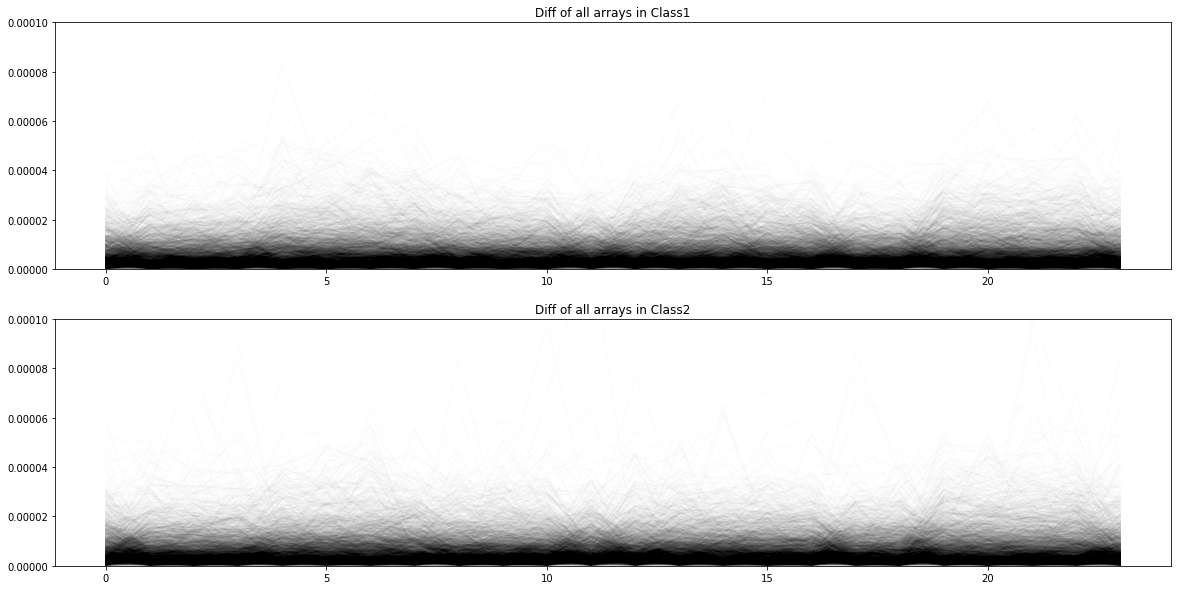

In [23]:
from numpy import diff

plt.figure(num=None, figsize=(20, 10))

y_lims = .0001
alpha = 0.01

plt.subplot(2,1,1)
plt.plot(np.absolute(diff(df_class1)), alpha=alpha, c='k')
plt.title('Diff of all arrays in Class1')
plt.ylim((0, y_lims))

plt.subplot(2,1,2)
plt.plot(np.absolute(diff(df_class2)), alpha=alpha, c='k')
plt.title('Diff of all arrays in Class2')
plt.ylim((0, y_lims))
    
plt.show()

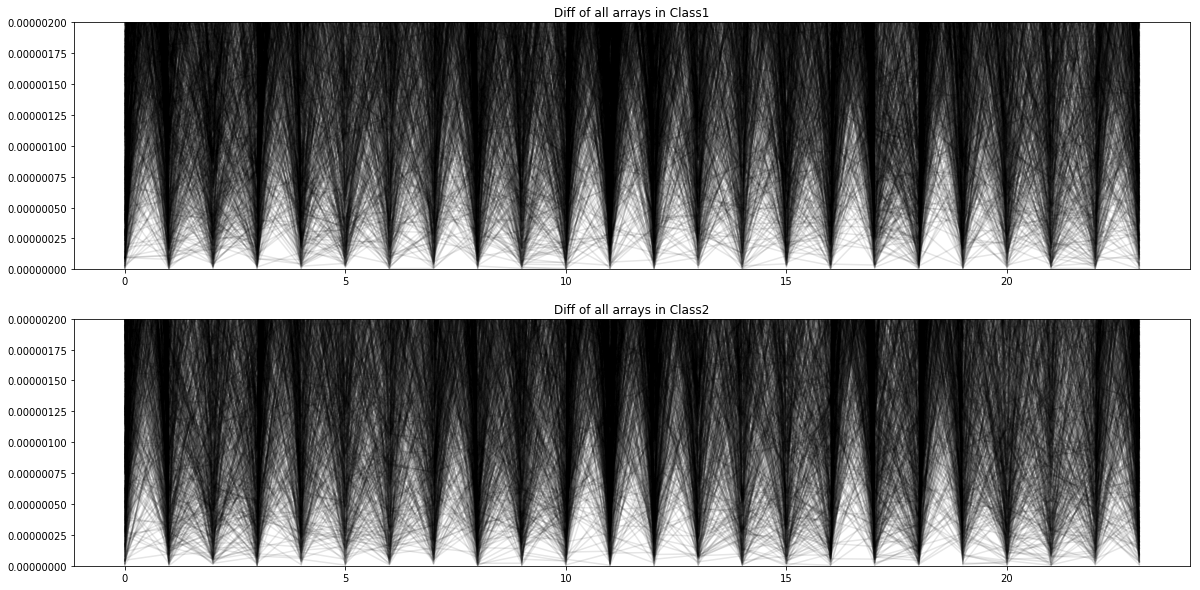

In [24]:
from numpy import diff

plt.figure(num=None, figsize=(20, 10))

y_lims = .000002
alpha = 0.1


plt.subplot(2,1,1)
plt.plot(np.absolute(diff(df_class1)), alpha=alpha, c='k')
plt.title('Diff of all arrays in Class1')
plt.ylim((0, y_lims))

plt.subplot(2,1,2)
plt.plot(np.absolute(diff(df_class2)), alpha=alpha, c='k')
plt.title('Diff of all arrays in Class2')
plt.ylim((0, y_lims))
    
plt.show()

The plot above shows no useful features to differentiate the two classes.

In [8]:
def plot_fft(index_begin=0, index_final=df_class1[0].shape[0], alpha=0.1, c='k'):
    plt.figure(num=None, figsize=(20, 10))
    
    y_max = 0

    N = index_final - index_begin

    plt.subplot(2,1,1)
    plt.title('FFT of range from ' + str(index_begin) + ' to ' + str(index_final) + ' in all arrays in Class1')
    for signal in df_class1:
        fft = scipy.fftpack.fft(signal[index_begin:index_final])
        y = np.abs(fft[:N//2])
        y_max = max(*y, y_max)
        plt.plot(y, alpha=alpha, c=c)
    
    plt.subplot(2,1,2)
    plt.title('FFT of range from ' + str(index_begin) + ' to ' + str(index_final) + ' in all arrays in Class2')
    for signal in df_class2:
        fft = scipy.fftpack.fft(signal[index_begin:index_final])
        y_max = max(*y, y_max)
        plt.plot(np.abs(fft[:N//2]), alpha=alpha, c=c)

    plt.subplot(2,1,1)
    plt.ylim((0, y_max))
    plt.subplot(2,1,2)
    plt.ylim((0, y_max))
    
    plt.show()

C:\Users\Diogo\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


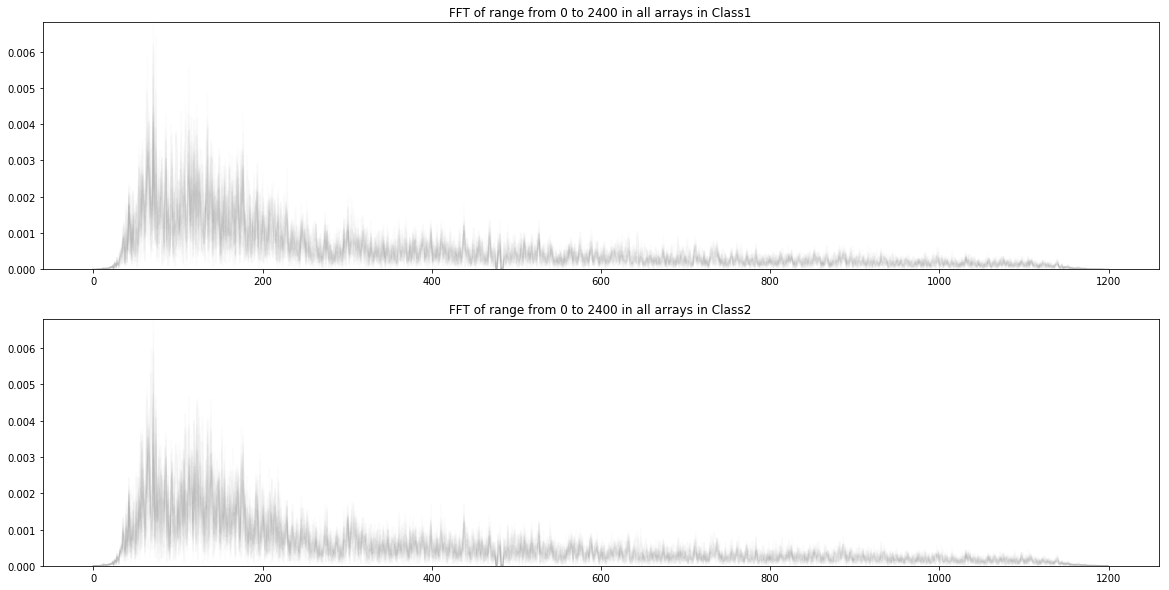

In [26]:
plot_fft(alpha=0.01)

FFT of the whole signal is also not a promising feature to separate the two classes.

C:\Users\Diogo\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


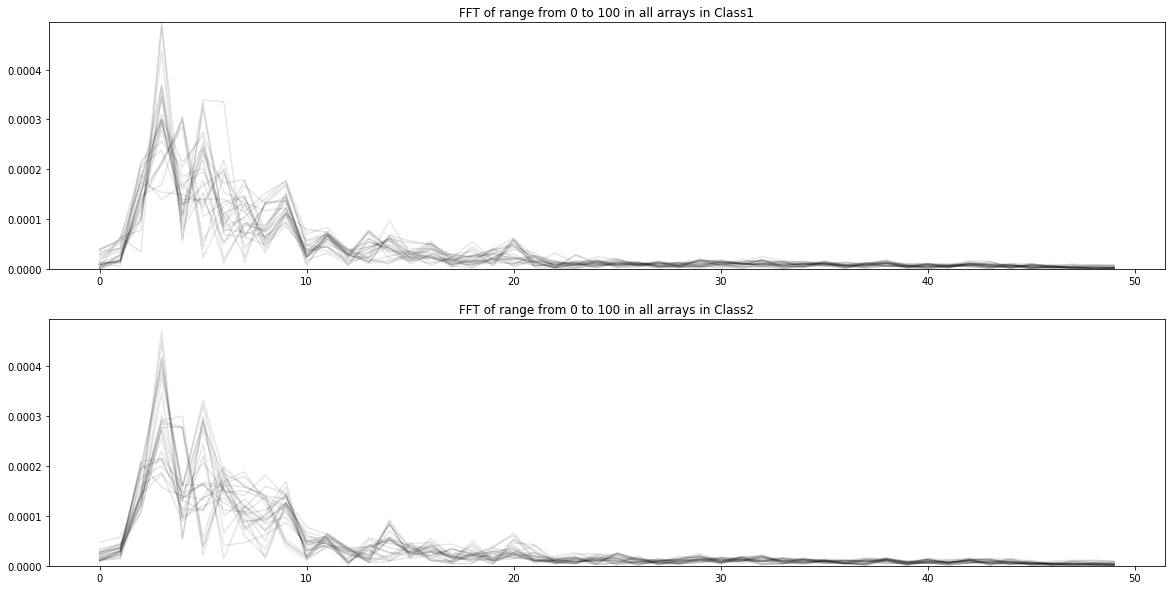

In [31]:
plot_fft(0, 100)

No noticeable difference between the two classes.

C:\Users\Diogo\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


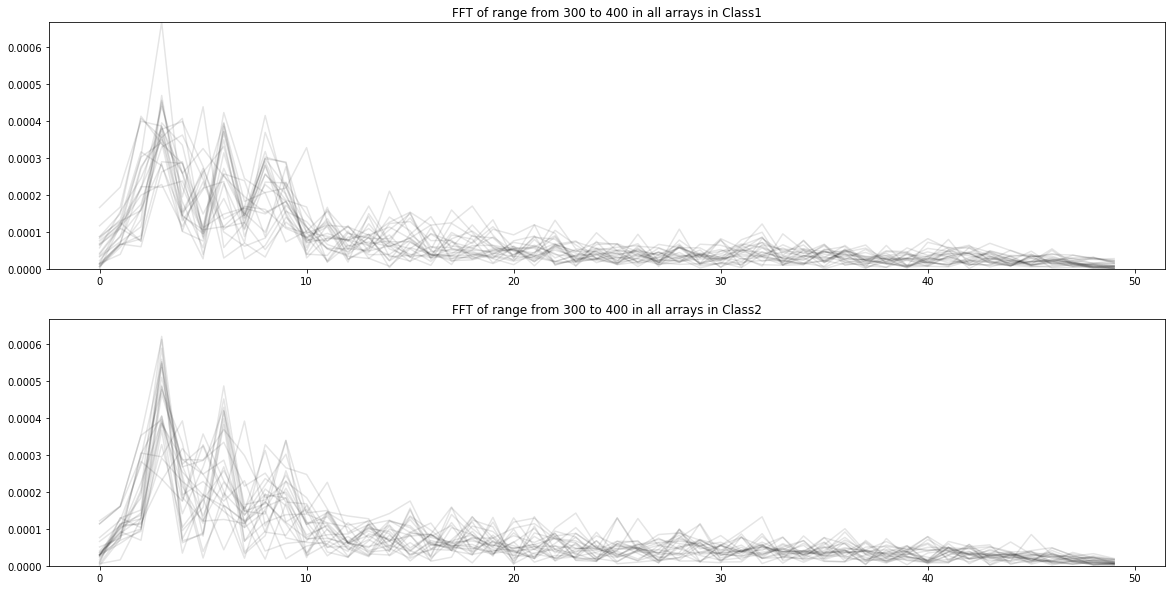

In [28]:
plot_fft(300, 400)

It looks like we found a feature! We should consider mean and standard deviation of intensity at 3Hz.

C:\Users\Diogo\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


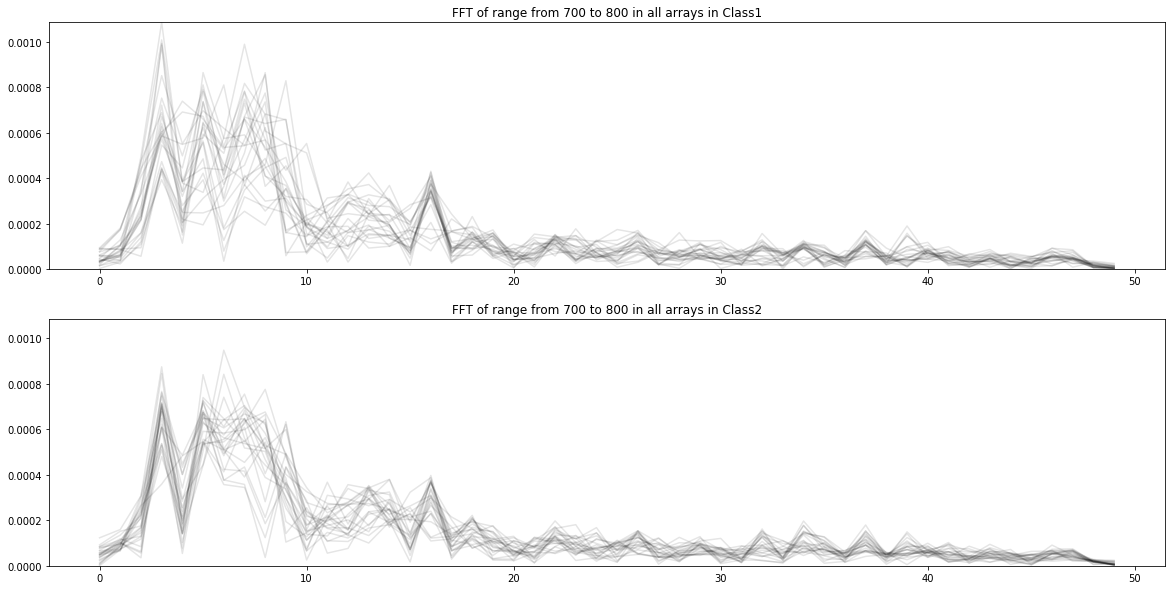

In [80]:
plot_fft(700, 800)

It looks like we found a feature! We should consider mean and standard deviation of intensity at 3Hz and 4Hz.

C:\Users\Diogo\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


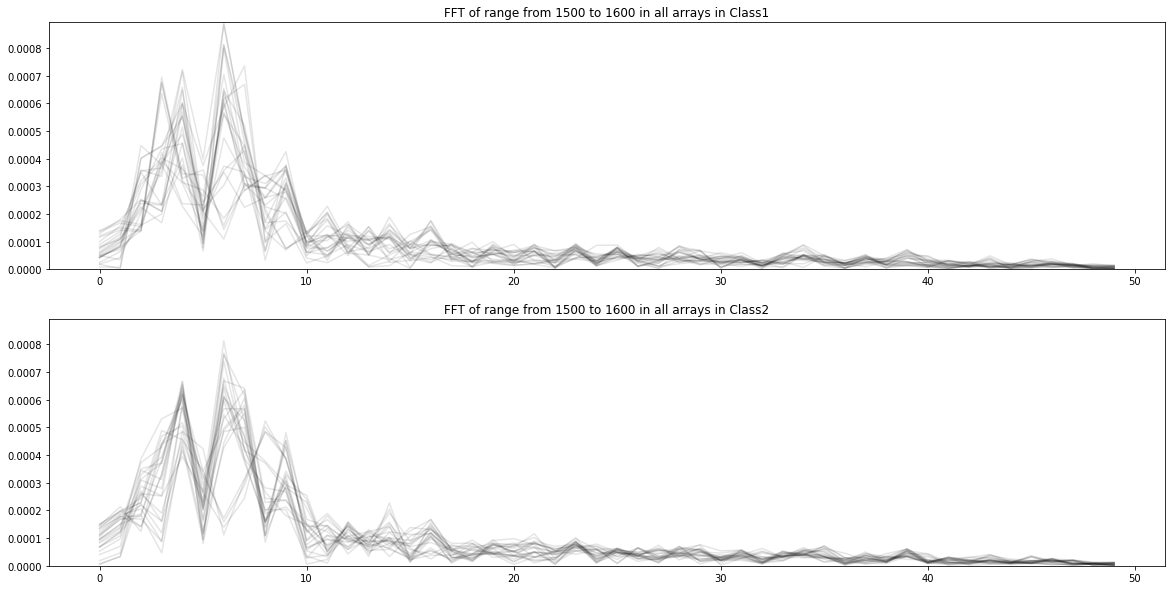

In [30]:
plot_fft(1500, 1600)

It looks like we found a feature! We should consider mean and standard deviation of intensity at 4Hz.

C:\Users\Diogo\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


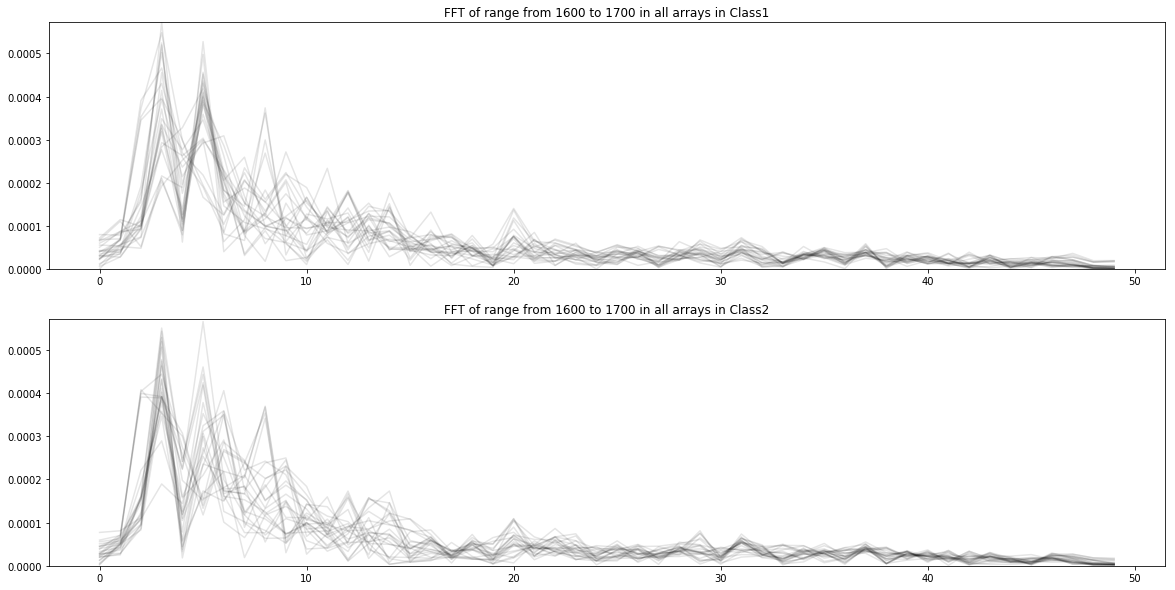

In [82]:
plot_fft(1600, 1700)

It looks like we found a feature! We should consider mean and standard deviation of intensity at 3Hz and 5Hz.

C:\Users\Diogo\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


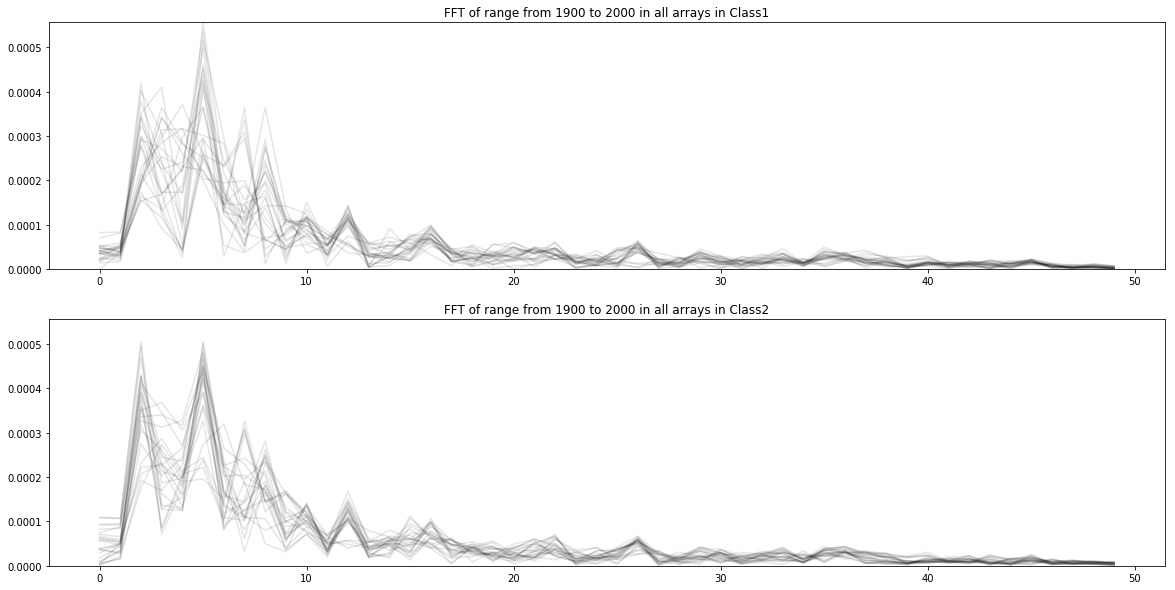

In [31]:
plot_fft(1900, 2000)

It looks like we found a feature! We should consider mean and standard deviation of intensity at 2Hz and 5Hz.

C:\Users\Diogo\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


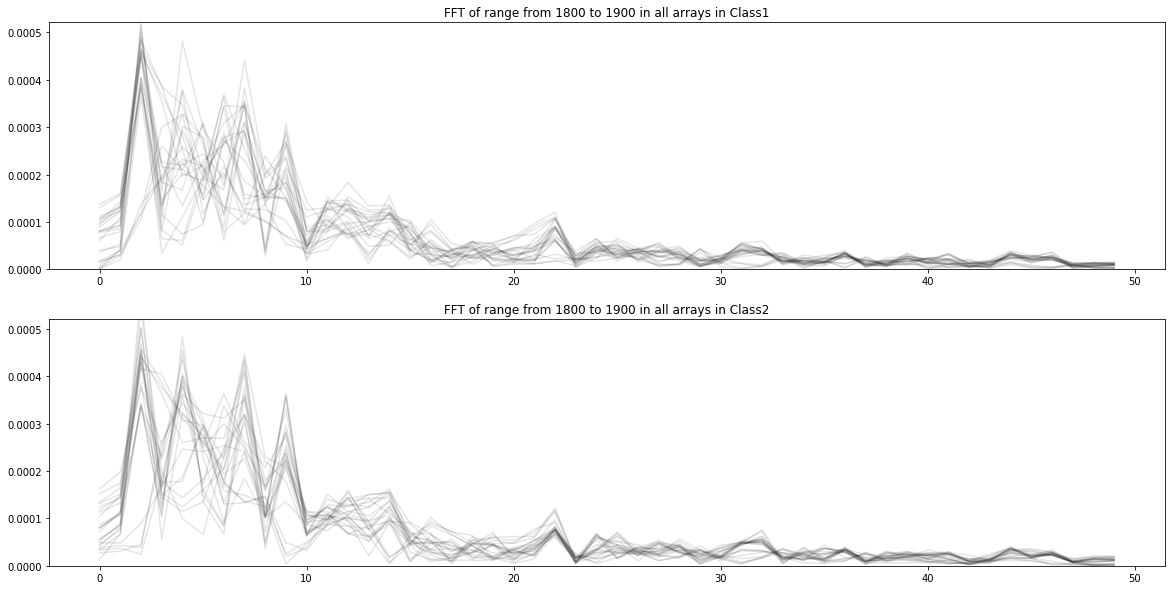

In [34]:
plot_fft(1800, 1900)

It looks like we found a feature! We should consider mean and standard deviation of intensity at 4Hz and 7Hz.

C:\Users\Diogo\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


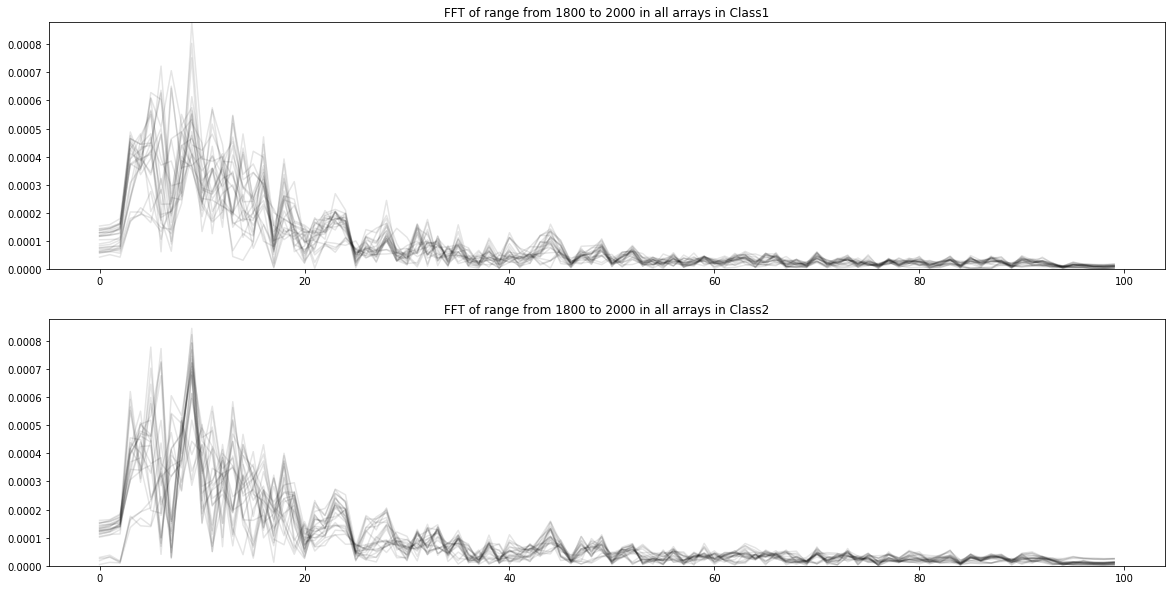

In [33]:
plot_fft(1800, 2000)

It looks like we found a feature! We should consider mean and standard deviation of intensity at 9Hz.

C:\Users\Diogo\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


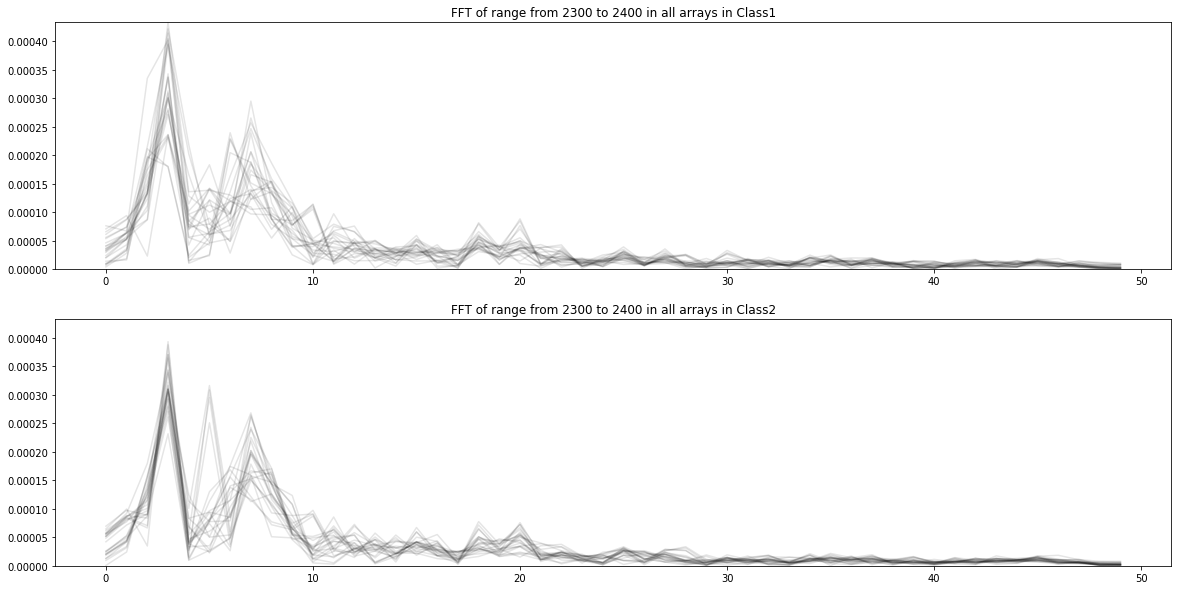

In [83]:
plot_fft(2300, 2400)

It looks like we found a feature! We should consider mean and standard deviation of intensity at 3Hz.